In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
import arviz as az
import bilby
import matplotlib.pyplot as plt
import numpy as np
import pickle
import ptemcee

Here is a checkpoint file from a `ptemcee` Bilby run:

In [9]:
with open('full_parameters_checkpoint_resume.pickle', 'rb') as f:
    ckpt = pickle.load(f)

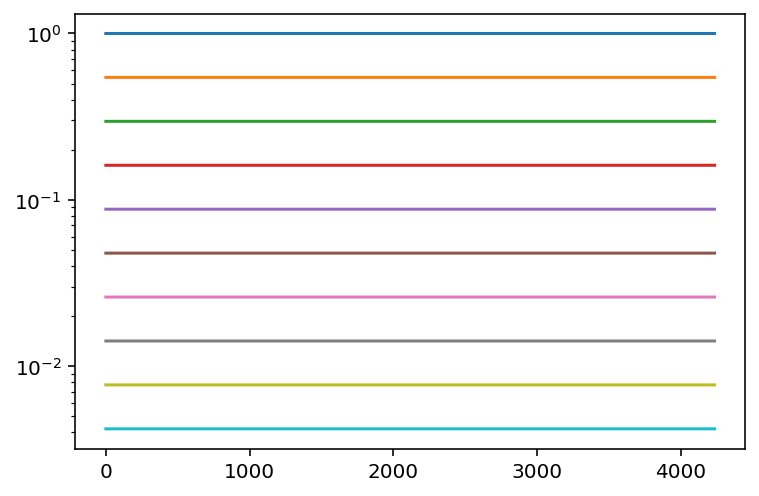

In [17]:
plt.plot(np.array(ckpt['beta_list']))
plt.yscale('log')

In [38]:
chains = ckpt['chain_array']
log_likelihoods = ckpt['log_likelihood_array']

In [48]:
chains.shape, log_likelihoods.shape

((100, 4500, 15), (10, 100, 4500))

Text(0, 0.5, '$\\left\\langle \\log \\mathcal{L} \\right\\rangle_{\\beta = 1}$')

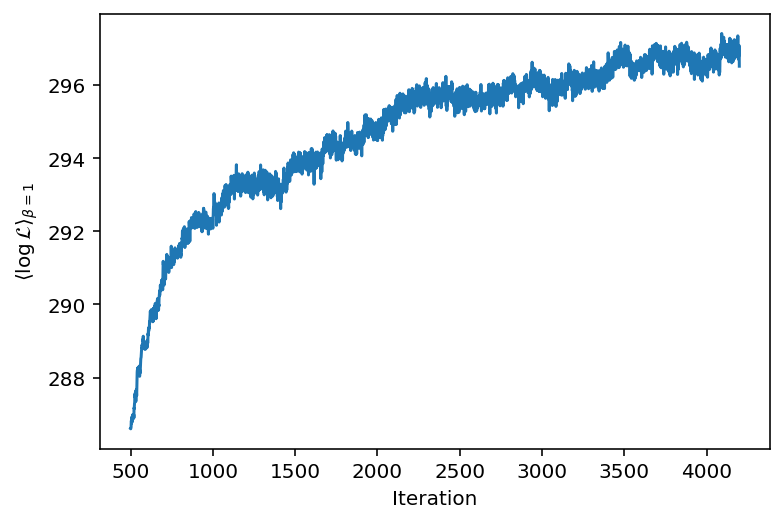

In [60]:
n_drop = 300
plt.plot(np.arange(500, log_likelihoods.shape[2]-n_drop), np.mean(log_likelihoods[0,:,500:-n_drop], axis=0))
plt.xlabel(r'Iteration')
plt.ylabel(r'$\left\langle \log \mathcal{L} \right\rangle_{\beta = 1}$')

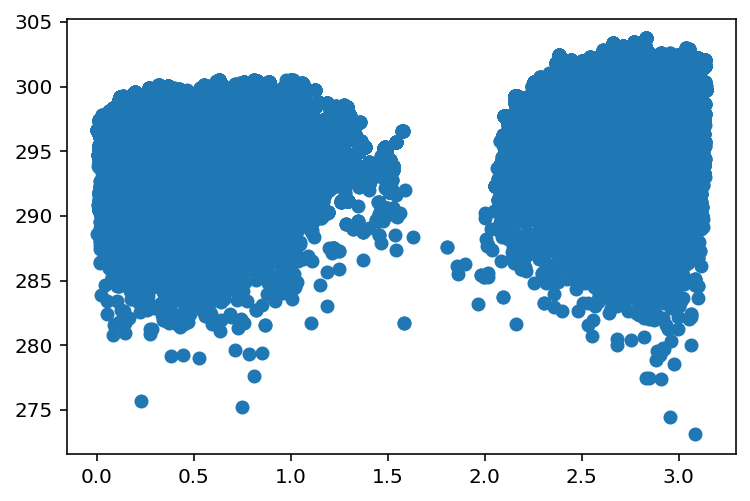

In [41]:
lls = log_likelihoods[0, :, 1500:4000].flatten()
theta_jns = chains[:,1500:4000, 5].flatten()
plt.scatter(theta_jns, lls)

In [33]:
sampler = ckpt['sampler']

In [25]:
chains.shape

(100, 4500, 15)

In [61]:
names = ['mass_ratio', 'chirp_mass', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'time_jitter']
idata = az.convert_to_inference_data({n: chains[:,:,i] for (i,n) in enumerate(names)})
burnin_idata = idata.sel(draw=slice(2000, 4000))

array([[<AxesSubplot:title={'center':'mass_ratio'}>,
        <AxesSubplot:title={'center':'mass_ratio'}>],
       [<AxesSubplot:title={'center':'chirp_mass'}>,
        <AxesSubplot:title={'center':'chirp_mass'}>],
       [<AxesSubplot:title={'center':'luminosity_distance'}>,
        <AxesSubplot:title={'center':'luminosity_distance'}>],
       [<AxesSubplot:title={'center':'dec'}>,
        <AxesSubplot:title={'center':'dec'}>],
       [<AxesSubplot:title={'center':'ra'}>,
        <AxesSubplot:title={'center':'ra'}>],
       [<AxesSubplot:title={'center':'theta_jn'}>,
        <AxesSubplot:title={'center':'theta_jn'}>],
       [<AxesSubplot:title={'center':'psi'}>,
        <AxesSubplot:title={'center':'psi'}>],
       [<AxesSubplot:title={'center':'phase'}>,
        <AxesSubplot:title={'center':'phase'}>],
       [<AxesSubplot:title={'center':'a_1'}>,
        <AxesSubplot:title={'center':'a_1'}>],
       [<AxesSubplot:title={'center':'a_2'}>,
        <AxesSubplot:title={'center':'a_2'}>]

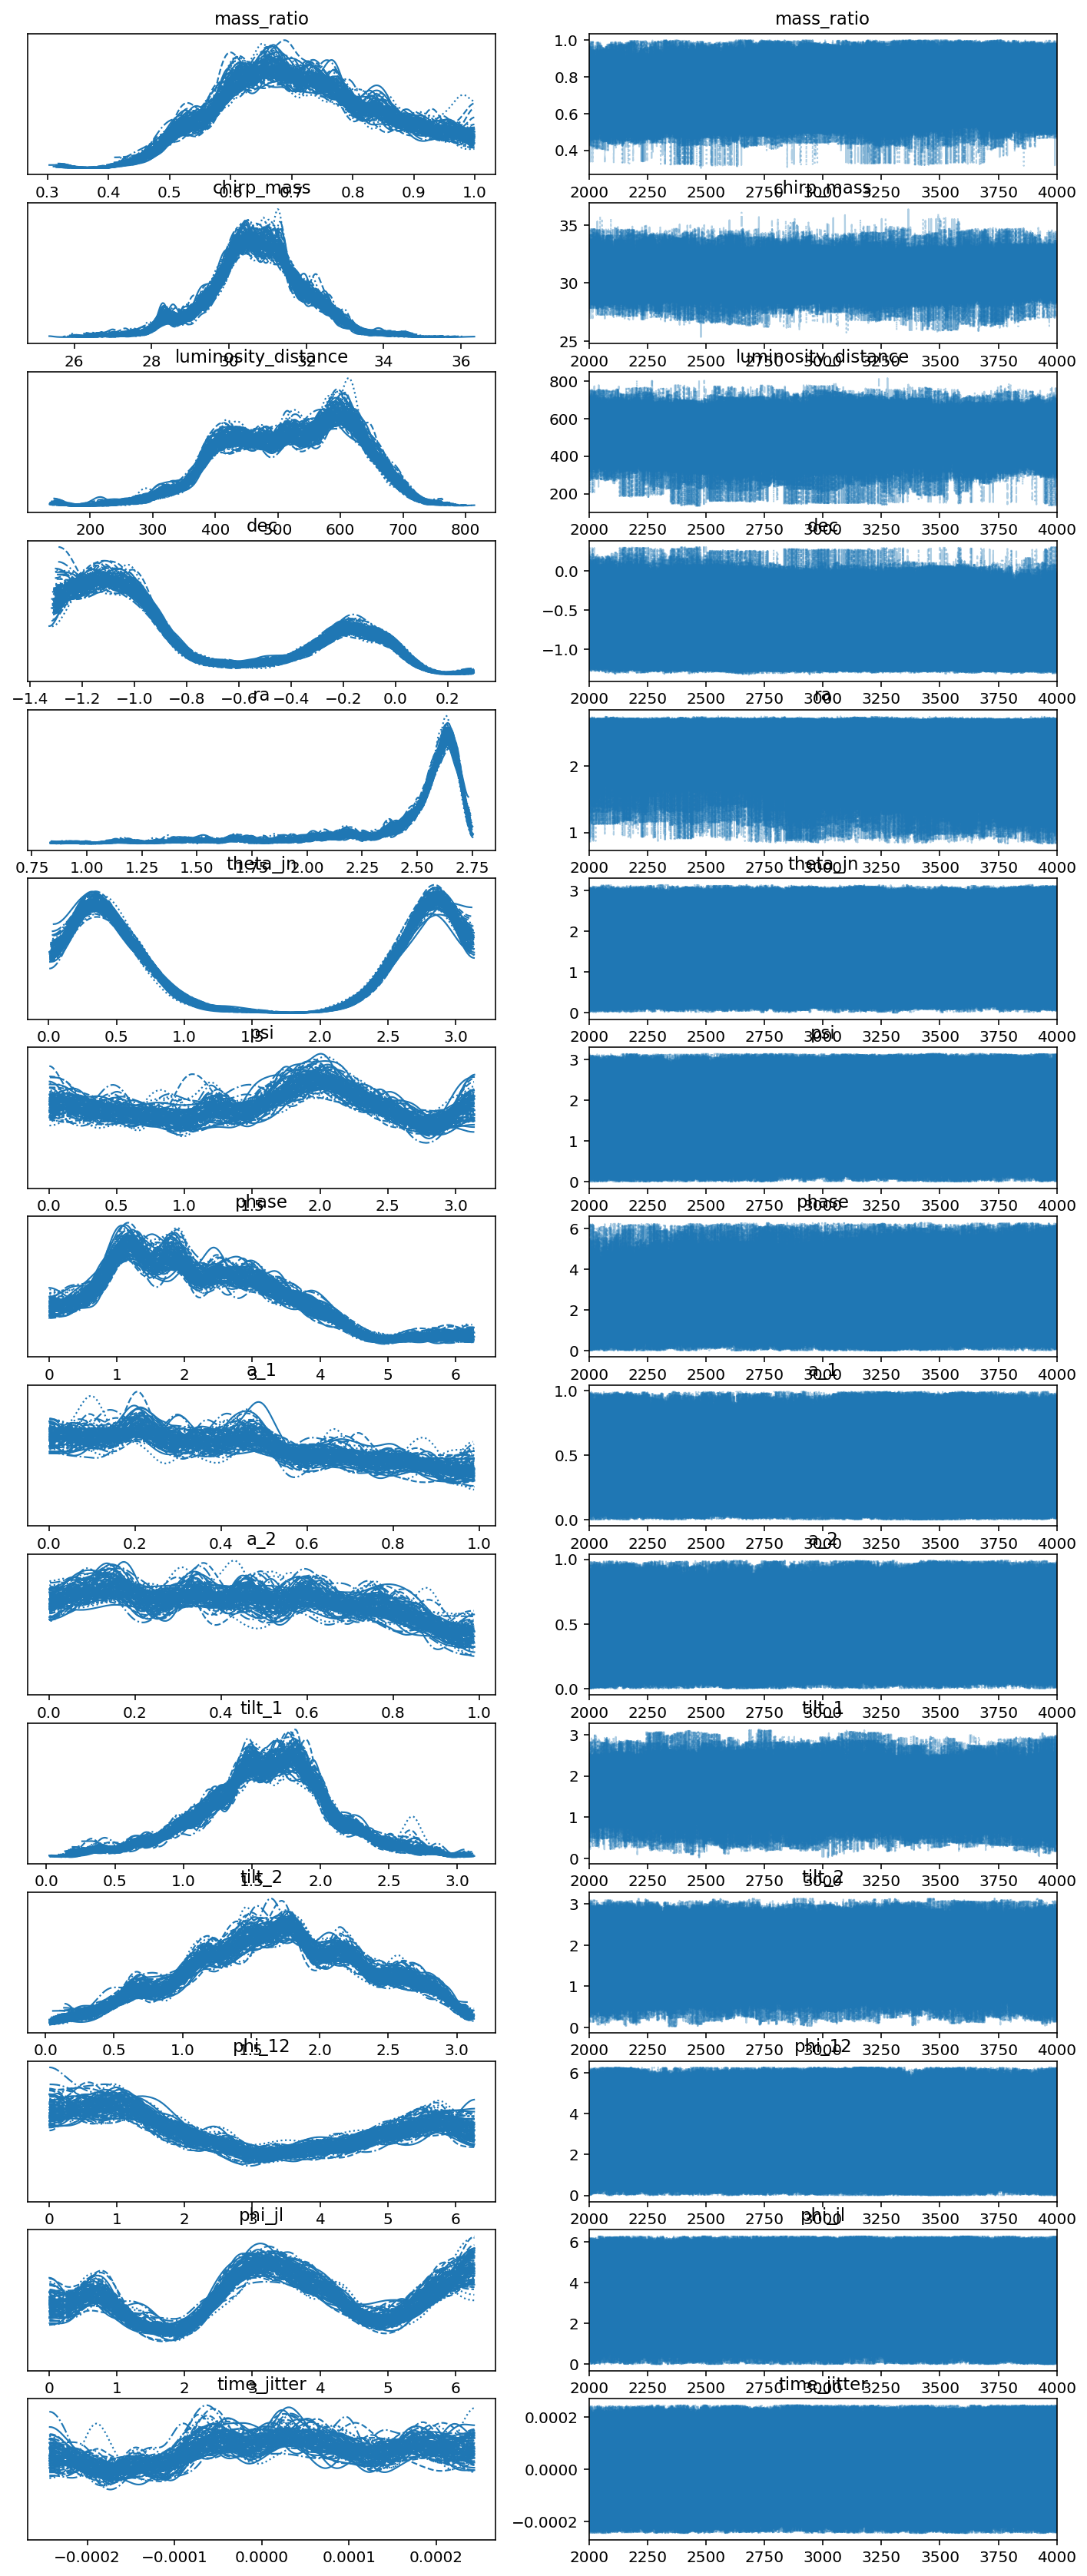

In [62]:
az.plot_trace(burnin_idata)